In [1]:
import os
import sys
pp_path = os.path.join("..", "pySMOKEPostProcessor")
sys.path.append(pp_path)
from pySMOKEpostprocessor import *
import networkx as nx
import pydot
from IPython.display import Image

# Flux Analysis

As for the Rate Of Production Analysis and Sensitivity Analysis first of all call the constructor of the Post Processor then acces the Flux Analysis.

* The constructor (**`pySMOKEpostprocessor`**) of the post processor accept three different arguments:
    > * `kinetic_mechanism` (*string*): path to the folder containing the files relative to the kinetic mechanism named directly, after the pre-processing by OpenSMOKE++: **kinetics.xml** and **reaction_names.xml**.
    > * `results_folder` (*string*): path to the folder containing the files relative to the output of the simulations that are directly generated by OpenSMOKE++. Depending on the need different files are required. For the computation of the Flux Analysis only the file named **Output.xml** is required.
    > * `verbose` (*bool*): whether or not to print some useful information about the computations.
* Function to perform Flux Analysis (**`FluxAnalysis`**) accepts several arguments hereinafter reported:
    > * `specie` (*string*): the name of the specie on which the flux analysis is wanted.
    > * `element` (*string*): the name of the element on which to perform the flux analysis. It is important that the specie selected for the flux analysis have to contain the element selected.
    > * `flux_analysis_type` (*string*): select the types of flux analtysis available. Two types settings are available "destruction" and "production".
    > * `thickness` (*string*): sets the thickness of the "arrows" in the graph. Two type of settings are available "absolute" and "relative (%)".
    > * `thickness_log_scale` (*bool*): select whether or not the thickness has to be computed using the logarithmic scale.
    > * `label_type` (*string*): select the type of the labels appearing on the graph "absolute" or "relative (%)".
    > * `depth` (*int* default: 2): maximum depth of the graph.
    > * `width` (*int* default: 5): maximum width of the graph.
    > * `threshold` (*float* default: 0.01): threshold to retain the reaction rate.
    > * `local_value` (*float*): value where to select the reaction rates.
 
You can either decide to show the entire graph and/or save it as png, as in the next cell, print the string in dot language used to generate the graph or either since the graph is generated through the use of `networkx` library you can decide to visualize only certain paths or extract different informations.

In [2]:
base_path = os.getcwd()
kineticFolder = os.path.join(base_path, "ROPA", "kinetics")
resultsFolder = os.path.join(base_path, "ROPA", "Output")

pp = pySMOKEpostproccesor(kinetic_mechanism = kineticFolder, 
                          results_folder = resultsFolder, 
                          verbose=True)

G = pp.FluxAnalysis(specie = "H2", 
                    element = "H", 
                    flux_analysis_type = "destruction", 
                    thickness = "relative", 
                    thickness_log_scale = True, 
                    label_type = "relative", 
                    depth = 2, 
                    width = 5, 
                    threshold = 0.01, 
                    local_value = 0.003258)

P = nx.nx_pydot.to_pydot(G)
graph_str = P.to_string()

ROPA available


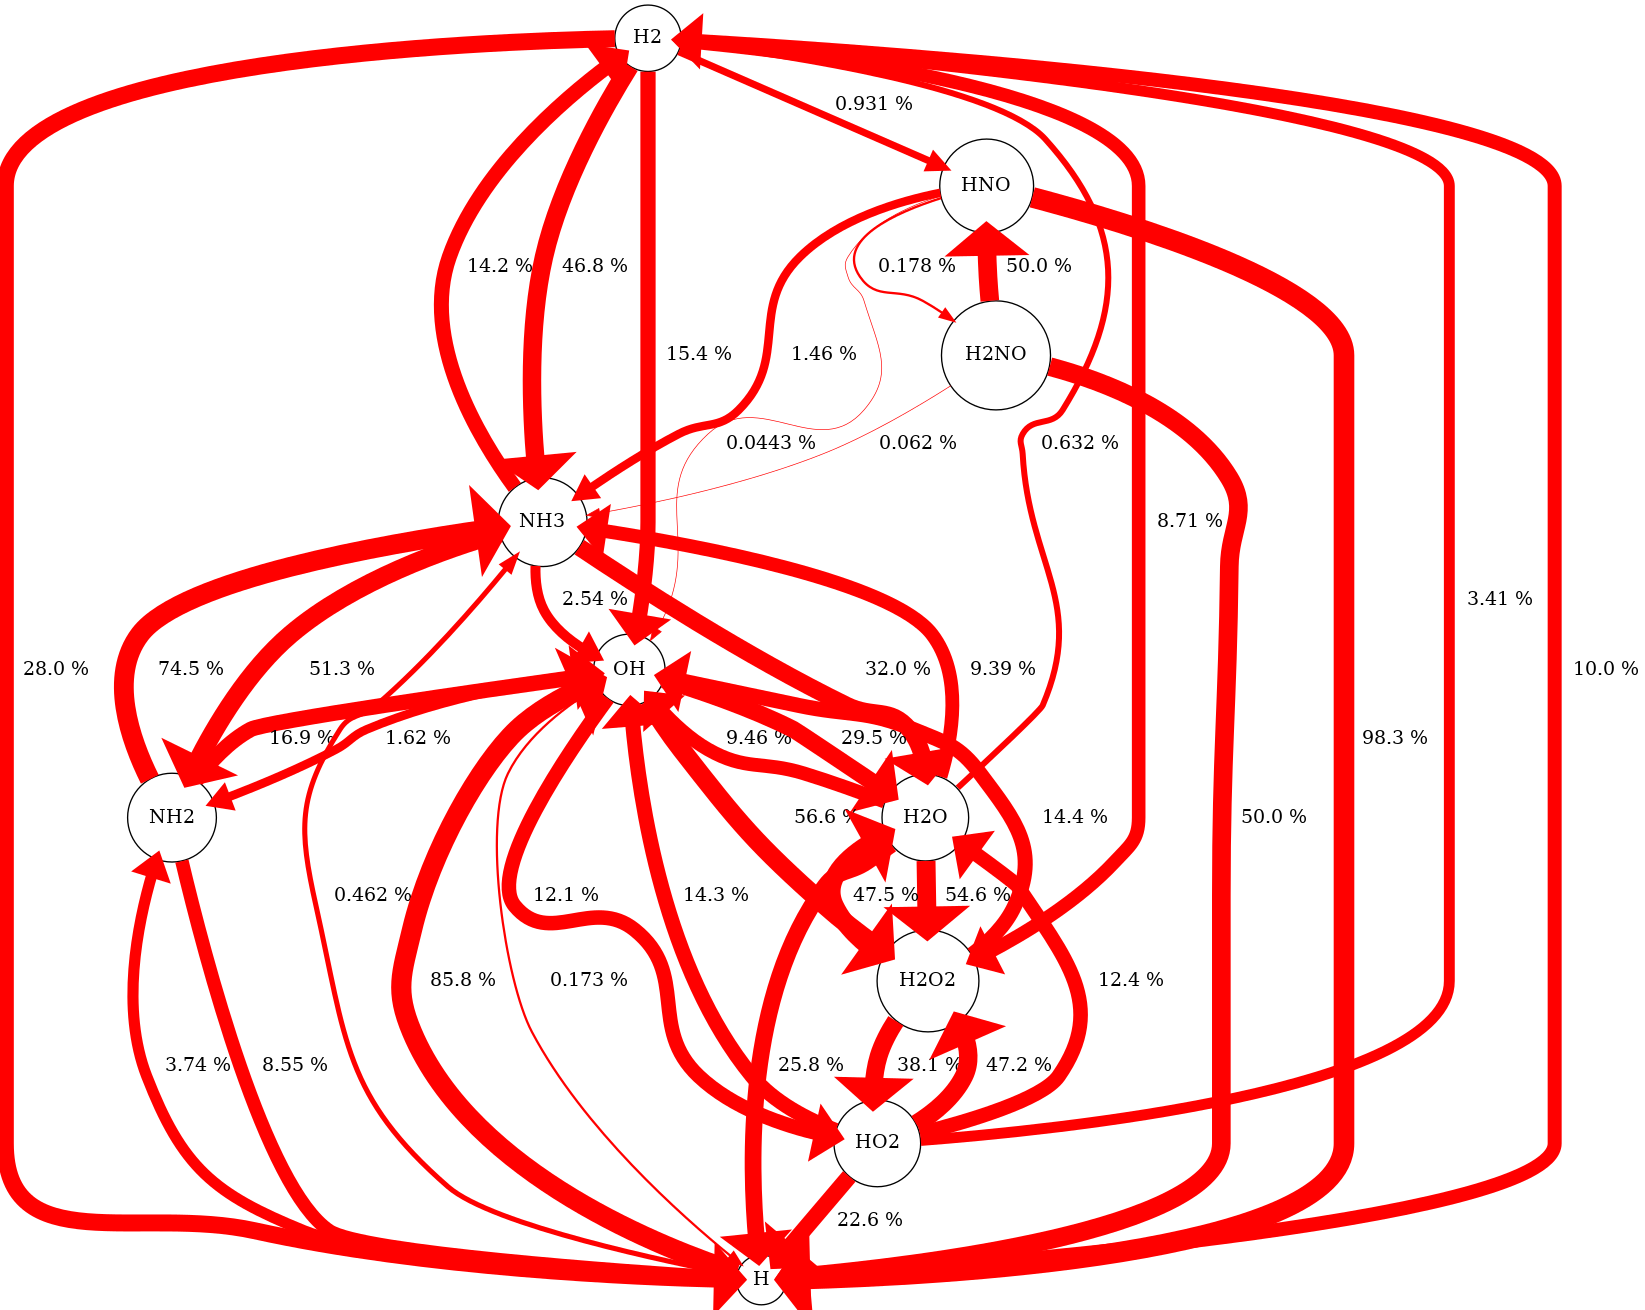

In [3]:
graph = pydot.graph_from_dot_data(graph_str)
img = Image(graph[0].create_png(), width = 1200, height = 1000) 
# Image(graph[0].create_png(), width = 1200, height = 900) 
img

In [4]:
# saving the graph as a png file

with open("figures/FluxAnalysis.png", "wb") as png:
    png.write(img.data)

## SUBGRAPH by selecting only the desired nodes

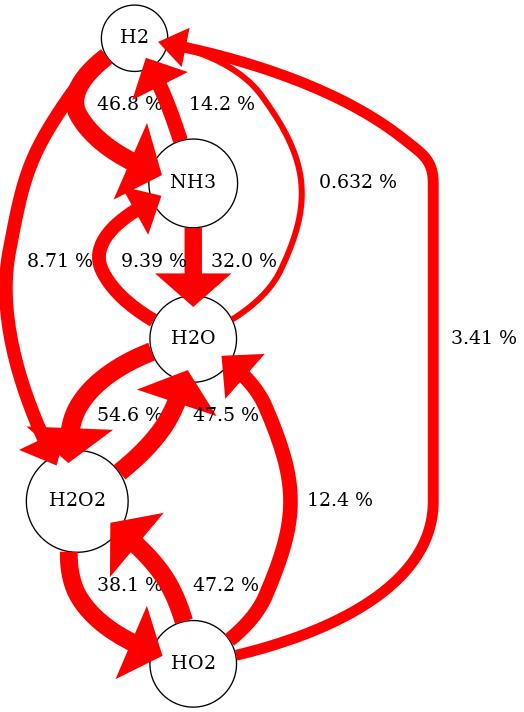

In [5]:
H = G.subgraph(['H2', 'NH3', 'H2O', 'H2O2', 'HO2'])
P = nx.nx_pydot.to_pydot(H)
graph_str = P.to_string()
graph = pydot.graph_from_dot_data(graph_str)
img = Image(graph[0].create_png()) 

img